In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
from utils import access_raster
from glob import glob
import re
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.stats import gaussian_kde
import seaborn as sns
import random
from scipy import optimize

In [3]:
basepath = "/home/abetatos/Escritorio/TFM_Dataset/3.Basedataset/"
aspect_path = basepath + "DEMSNOW"
hs_path = basepath + "HS"

is_tiff = lambda x: re.search(".tiff?$", x)

def get_dataframe(path, key): 
    files = filter(is_tiff, glob(path + "/**/*", recursive=True))
    df = pd.DataFrame(files, columns=[key])
    df['file'] = df[key].apply(lambda p: Path(p).parts[-2])
    df = df.set_index("file")
    return df

def get_array(raster): 
    array = raster['array'][0]
    nodata = raster['meta']['nodata']
    array[array==nodata]=0
    return array

In [4]:
df = get_dataframe(aspect_path, "DEMSNOW")[1:]
df['HS'] = get_dataframe(hs_path, "HS")['HS']
len(df)

15

In [5]:
def get_mapping(series):
    aspect_raster = access_raster(series['DEMSNOW'])
    hs_raster = access_raster(series['HS'])

    aspect_array = get_array(aspect_raster)
    hs_array = get_array(hs_raster)
    
    mapping = [[a, hs] for aspect_line, hs_line in zip(aspect_array, hs_array) 
                       for a, hs in zip(aspect_line, hs_line)
                       if hs > 0]
    
    return mapping

        
def fit_curve(x, y, ax): 
    def test_func(x, a, b):
        return a * x + b
    try:
        params, params_covariance = optimize.curve_fit(test_func, x, y, p0=[1, 0],
                                                method="trf", absolute_sigma=True)
    except RuntimeError: 
        print("Optimal parameters not found, fit won't be displayed")
        plt.show()
        return None
        

    params, params_covariance = optimize.curve_fit(test_func, x, y, p0=[1, 0],
                                                method="trf", absolute_sigma=True)

    # plt.figure(figsize=(6, 4))
    # plt.scatter(x, y, label='Data', s=1)

    x, y = zip(*sorted(zip(x, y)))
    x, y = np.array(x), np.array(y)
    fitted_y = test_func(x, params[0], params[1])
    ax.plot(x, fitted_y,
            label='Linear regression', color="red")

    ax.legend(loc='best')

    plt.show()
    print(f"Fitted function: {round(params[0]*1e5, 3)}*10^-5 * x + {round(params[1], 3)}")
    
    
    mse = np.mean((y - fitted_y) ** 2)
    print("MSE:", mse)
    ss_res = np.sum((y - fitted_y) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r_sq = 1 - (ss_res / ss_tot)
    print("R^2:", r_sq)
    
    return r_sq

def plot_map(_mapping):
    mapping = deepcopy(_mapping)
    random.shuffle(mapping)

    x, y = zip(*mapping[:10000])
    x, y = np.array(x), np.array(y)
    xy = np.vstack([x,y])
    kernel = gaussian_kde(xy)(xy)
    
    fig, ax = plt.subplots()
    ax.scatter(x, y, c=kernel, s=1, label="scatter plot")
    
    fit_curve(x, y, ax)
    
    return x

def plot_slices(mapping): 
    df = pd.DataFrame(mapping)
    df[0] = df[0].apply(lambda x: round(x, 2))
    new_mapping = df.groupby(0).apply(np.mean, axis=0).values

    plot_map(new_mapping)
    return df

____________________________________________________________________________________________________ 
 HS_Saflischpass_20220512_1m_epsg2056


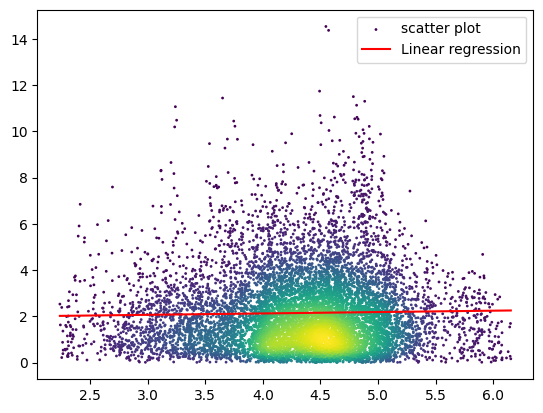

Fitted function: 5984.957*10^-5 * x + 1.883
MSE: 2.8525345
R^2: 0.0005311965942382812


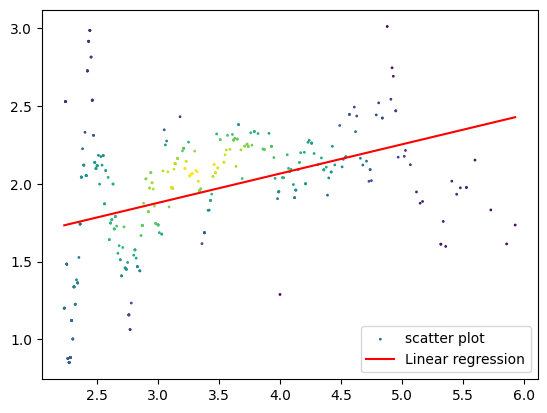

Fitted function: 18787.012*10^-5 * x + 1.315
MSE: 0.16040227633356197
R^2: 0.1454935298892036
____________________________________________________________________________________________________ 
 HS_Laucherenalp_20220511_1m_epsg2056


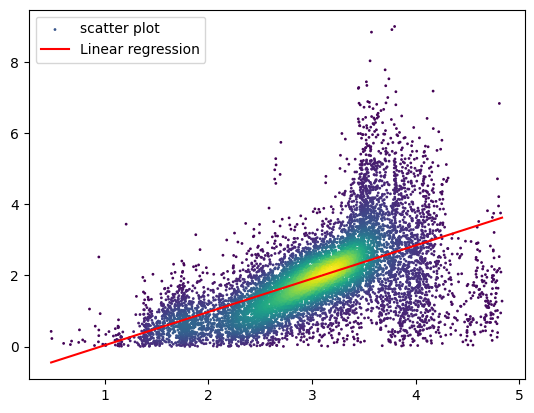

Fitted function: 93634.465*10^-5 * x + -0.9
MSE: 0.93853027
R^2: 0.31777459383010864


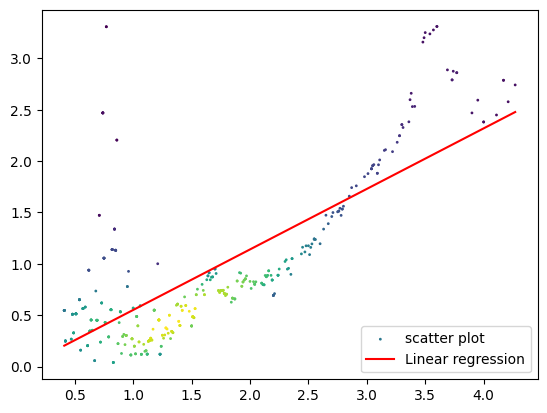

Fitted function: 58906.323*10^-5 * x + -0.038
MSE: 0.2439569453241945
R^2: 0.5471523923238792
____________________________________________________________________________________________________ 
 snowmap_2014_ads_100_extent_maskiert_nosnow0_noausreisser


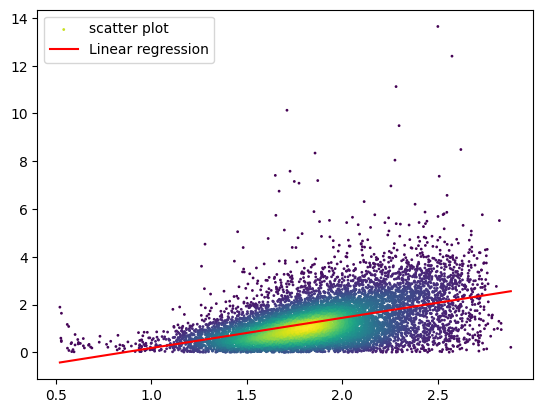

Fitted function: 126472.831*10^-5 * x + -1.084
MSE: 0.73912394
R^2: 0.2161882519721985


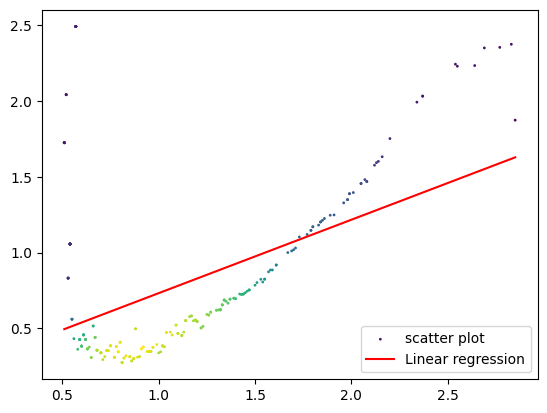

Fitted function: 48479.511*10^-5 * x + 0.248
MSE: 0.25971376270166535
R^2: 0.21030352974075883
____________________________________________________________________________________________________ 
 HS_Davos_20200406_2m_epsg2056


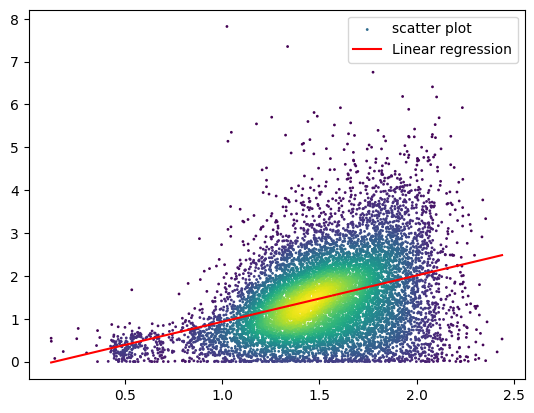

Fitted function: 108124.195*10^-5 * x + -0.152
MSE: 0.82439554
R^2: 0.1345260739326477


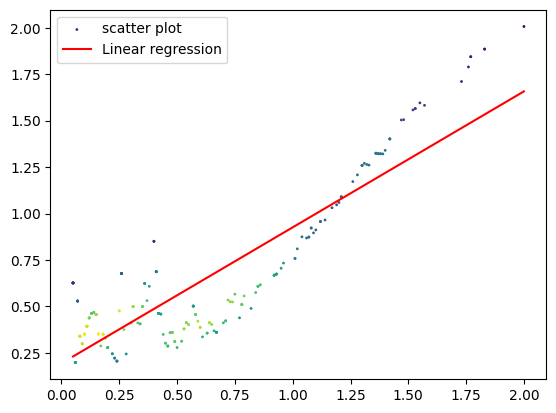

Fitted function: 73210.279*10^-5 * x + 0.194
MSE: 0.03593164623133698
R^2: 0.7721539693579693
____________________________________________________________________________________________________ 
 HS_Davos_20211604_2m_epsg2056


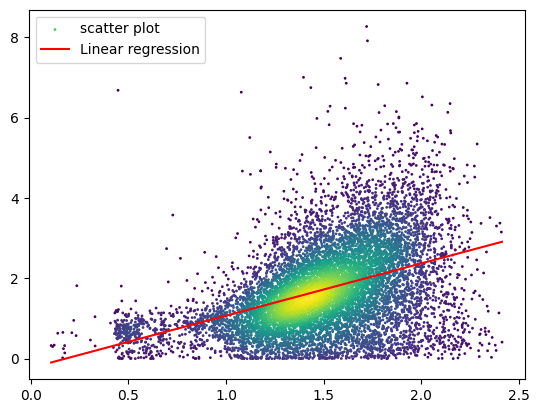

Fitted function: 130155.171*10^-5 * x + -0.231
MSE: 0.96290106
R^2: 0.17750751972198486


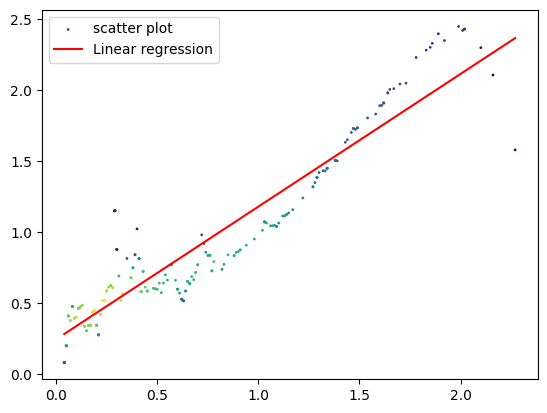

Fitted function: 93464.997*10^-5 * x + 0.246
MSE: 0.038814715366778434
R^2: 0.8764712822481138
____________________________________________________________________________________________________ 
 snowmap_2013_ads_80_extent_maskiert_nosnow0_noausreisser


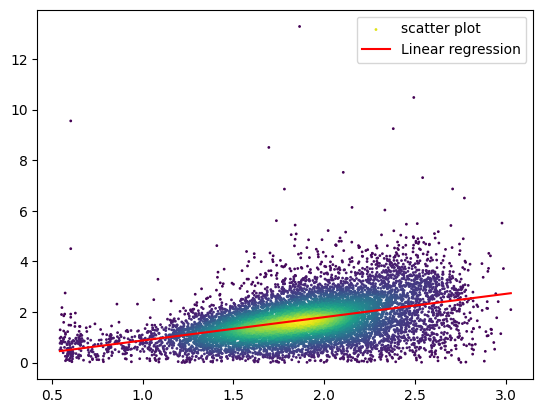

Fitted function: 92176.978*10^-5 * x + -0.049
MSE: 0.6317311
R^2: 0.19037467241287231


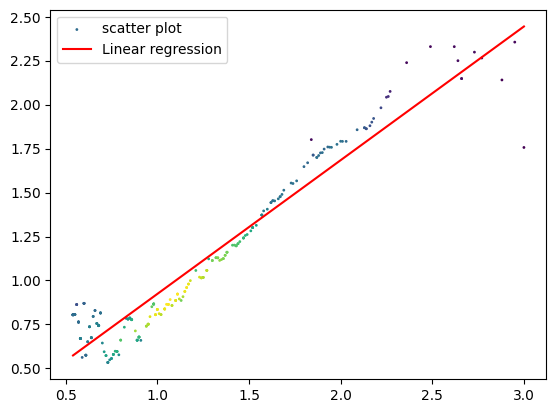

Fitted function: 76041.476*10^-5 * x + 0.163
MSE: 0.016587834454001592
R^2: 0.9167084123212724
____________________________________________________________________________________________________ 
 snowmap_2012_ads_80_extent_maskiert_nosnow0_noausreisser


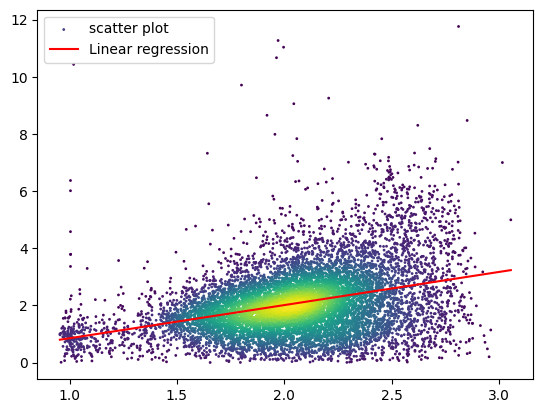

Fitted function: 115862.522*10^-5 * x + -0.308
MSE: 1.1937354
R^2: 0.12460833787918091


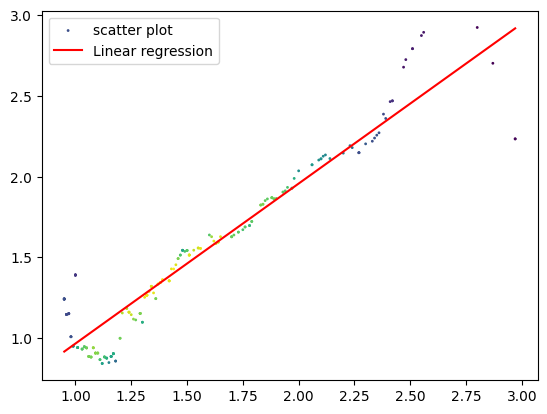

Fitted function: 99018.535*10^-5 * x + -0.023
MSE: 0.02748015676513553
R^2: 0.8917323842537742
____________________________________________________________________________________________________ 
 snowmap_2015_ads_100_extent_maskiert_nosnow0_noausreisser


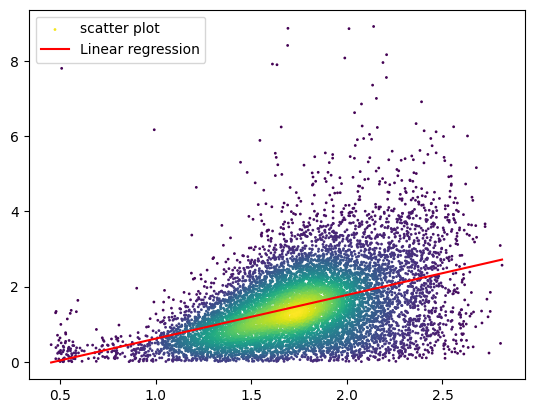

Fitted function: 116069.974*10^-5 * x + -0.544
MSE: 0.80297995
R^2: 0.18415993452072144


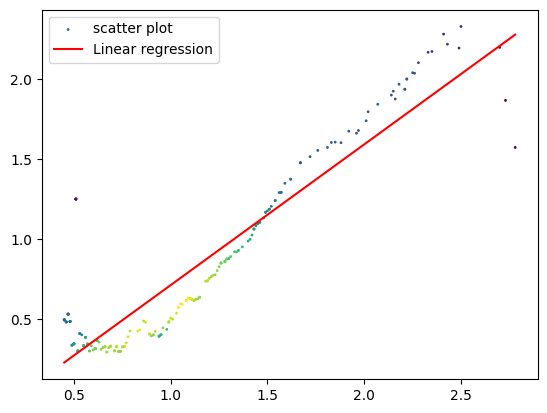

Fitted function: 87844.118*10^-5 * x + -0.166
MSE: 0.0466905902568879
R^2: 0.8375706089187851
____________________________________________________________________________________________________ 
 snowmap_20160126_ads_100_extent_maskiert_nosnow0_noausreisser


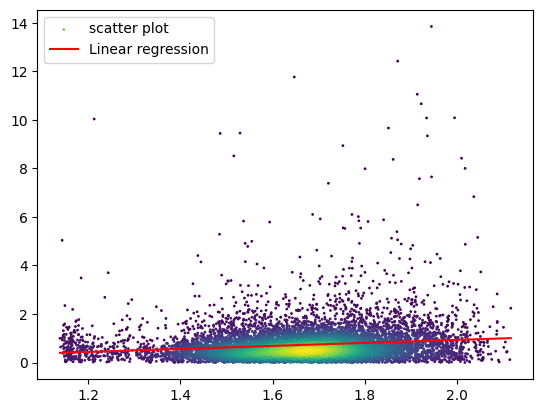

Fitted function: 61693.732*10^-5 * x + -0.303
MSE: 0.52665067
R^2: 0.020394623279571533


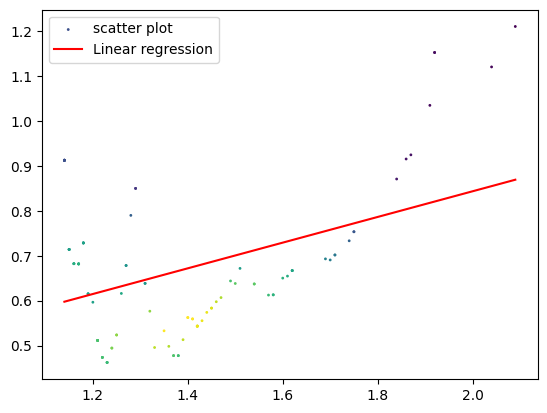

Fitted function: 28561.515*10^-5 * x + 0.272
MSE: 0.02290837321646414
R^2: 0.16264295037536702
____________________________________________________________________________________________________ 
 HS_c_20220223_1m_epsg2056


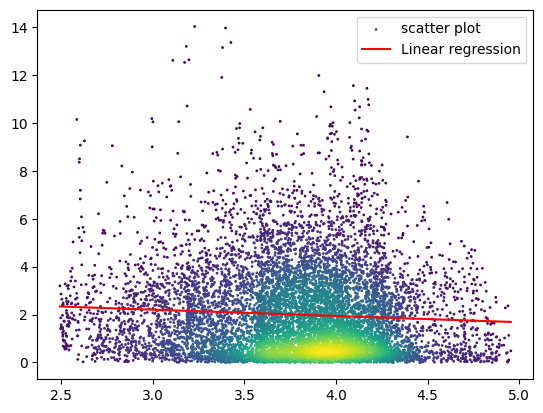

Fitted function: -26191.625*10^-5 * x + 2.99
MSE: 3.4815586
R^2: 0.003831207752227783


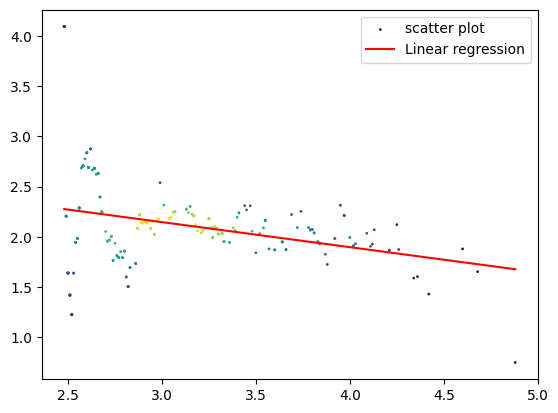

Fitted function: -24906.949*10^-5 * x + 2.894
MSE: 0.156887130705824
R^2: 0.09729866795517228
____________________________________________________________________________________________________ 
 HS_Davos_20170316_2m_epsg2056


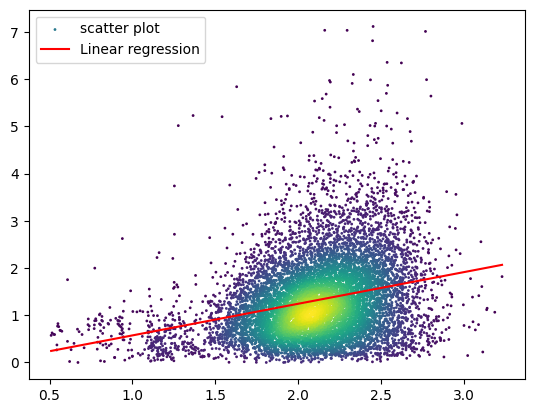

Fitted function: 66958.465*10^-5 * x + -0.097
MSE: 0.6380795
R^2: 0.07599151134490967


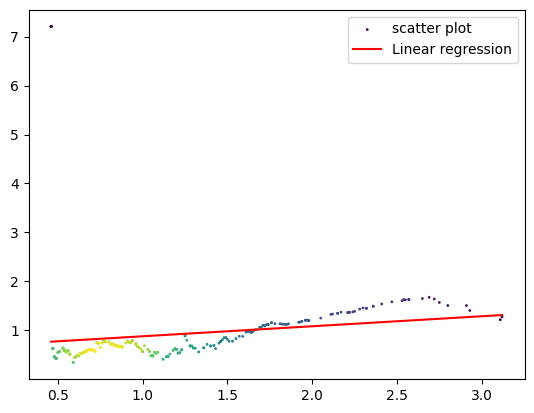

Fitted function: 20444.741*10^-5 * x + 0.675
MSE: 0.9242279947073337
R^2: 0.01729790703580203
____________________________________________________________________________________________________ 
 HS_Davos_20180411_2m_epsg2056


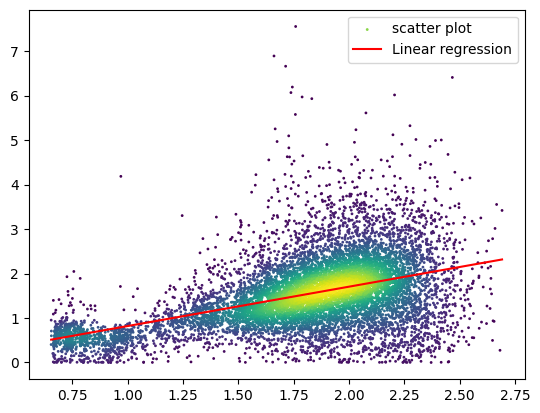

Fitted function: 88499.434*10^-5 * x + -0.066
MSE: 0.48737255
R^2: 0.2287241816520691


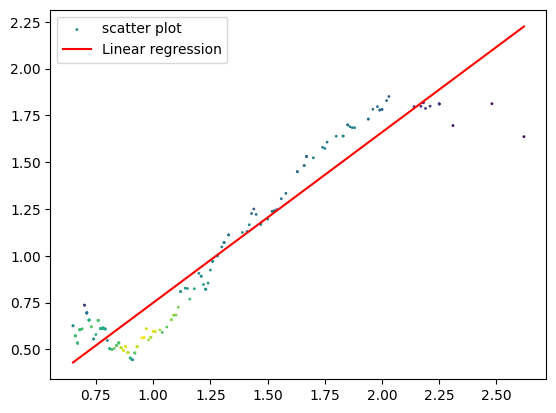

Fitted function: 91087.979*10^-5 * x + -0.162
MSE: 0.018020533486327747
R^2: 0.9129853893529569
____________________________________________________________________________________________________ 
 snowmap_20160420_ads_100_extent_maskiert_nosnow0_noausreisser


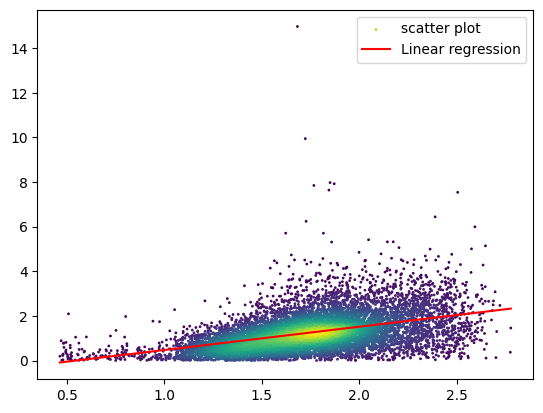

Fitted function: 104266.419*10^-5 * x + -0.569
MSE: 0.5416688
R^2: 0.20327407121658325


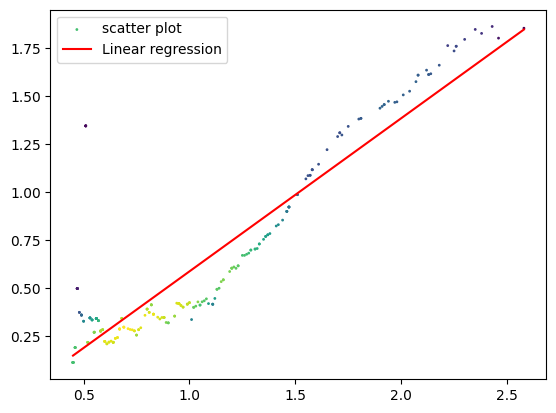

Fitted function: 79925.99*10^-5 * x + -0.213
MSE: 0.03946346610019564
R^2: 0.8203919973250211
____________________________________________________________________________________________________ 
 HS_Laucherenalp_20220224_2m_epsg2056


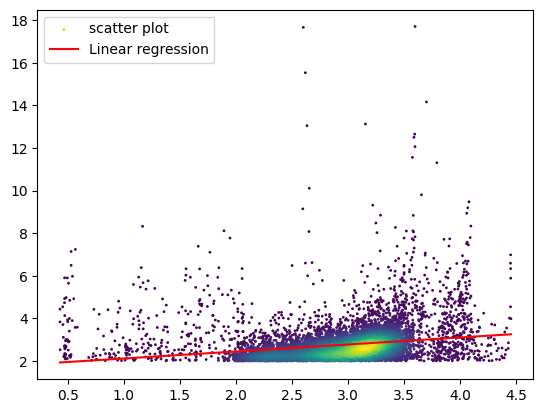

Fitted function: 32873.155*10^-5 * x + 1.79
MSE: 0.67491066
R^2: 0.04324060678482056


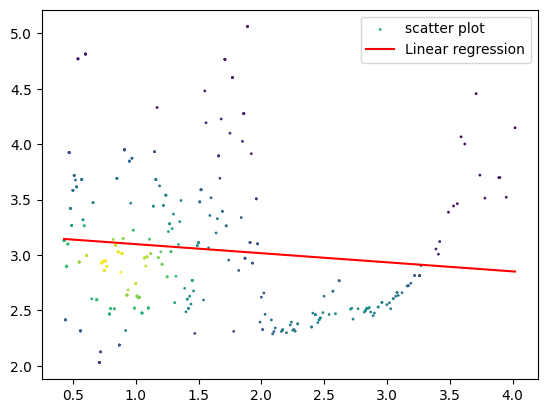

Fitted function: -8194.139*10^-5 * x + 3.179
MSE: 0.3711177610719008
R^2: 0.014231075488889577
____________________________________________________________________________________________________ 
 snowmap_2010_ads_80_extent_maskiert_nosnow0_noausreisser


In [6]:
for index, series in df.iterrows(): 
    print("_"*100, "\n", series.name)
    mapping = get_mapping(series)
    plot_map(mapping)
    new_mapping = plot_slices(mapping)